In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("Placement_Data_Full_Class.csv")
import os
os.makedirs('models', exist_ok=True)

data.head()



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2]:
cols_to_drop = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'salary']
existing_cols = [col for col in cols_to_drop if col in data.columns]
data.drop(existing_cols, axis=1, inplace=True)
data.head() 





,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


In [3]:
data.shape



(215, 10)

In [4]:
data.isnull().sum()


sl_no             0
gender            0
ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

# Preprocessing Encoding


In [5]:



# Now map gender
data['gender'] = data['gender'].map({'M': 0, 'F': 1})
data['workex'] = data['workex'].map({"No":0, "Yes":1})
data["status"] = data['status'].map({"Not Placed":0, "Placed":1})
data['specialisation'] = data['specialisation'].map({"Mkt&HR":0, "Mkt&Fin":1})
# Optional: Check result



In [6]:
data


,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,82.00,77.60,0,91.0,1,74.49,1
211,212,0,58.00,60.00,72.00,0,74.0,1,53.62,1
212,213,0,67.00,67.00,73.00,1,59.0,1,69.72,1
213,214,1,74.00,66.00,58.00,0,70.0,0,60.23,1


In [7]:
data['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [8]:

from sklearn.utils import resample

data_majority = data[data['status'] == 1]
data_minority = data[data['status'] == 0]

data_minority_upsampled = resample(
    data_minority,
    replace=True,                  # sample with replacement
    n_samples=len(data_majority), # match majority class
    random_state=42               # reproducible results
)

# Combine majority class with upsampled minority class
balanced_data = pd.concat([data_majority, data_minority_upsampled])


In [9]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

Train Test Split


In [10]:
#Separate Feature and Target
X = balanced_data.copy().drop('status', axis=1)
Y = balanced_data['status']

In [11]:
#train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape



((207, 9), (207,), (89, 9), (89,))

Feature Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.15566038, 1.        , 0.95041322, ..., 0.80168776, 1.        ,
        0.80847076],
       [0.93396226, 1.        , 0.53719008, ..., 0.80168776, 0.        ,
        0.77773613],
       [0.0754717 , 0.        , 0.45454545, ..., 0.21097046, 1.        ,
        0.42466267],
       ...,
       [0.42924528, 0.        , 0.22727273, ..., 0.35864979, 0.        ,
        0.43403298],
       [0.06132075, 1.        , 0.74380165, ..., 0.37974684, 1.        ,
        0.65292354],
       [0.91509434, 0.        , 0.22727273, ..., 0.18987342, 1.        ,
        0.50712144]])

K-nearest neighbor

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn =  KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, Y_train)
Knn_Y_pred = knn.predict(X_test)

accuracy_score = accuracy_score(Knn_Y_pred, Y_test)
accuracy_score



0.797752808988764

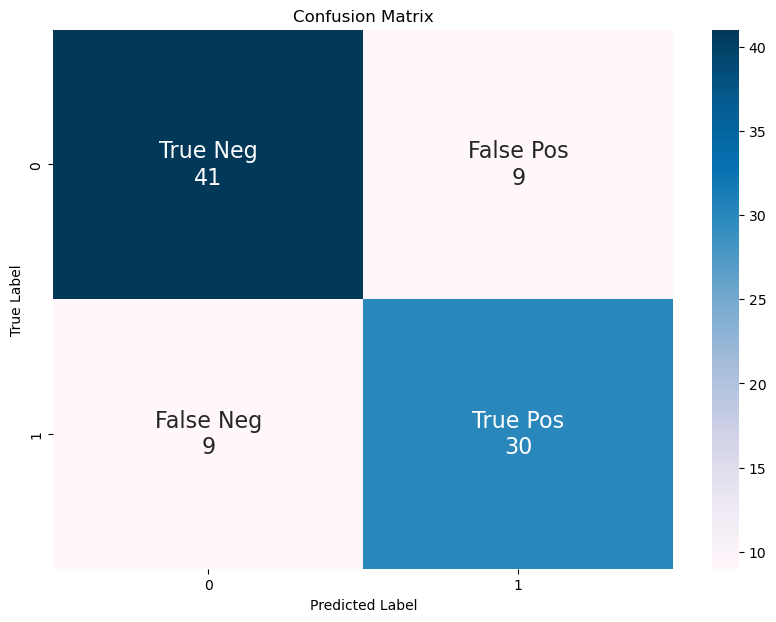

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Make sure numpy is imported

conf_mat = confusion_matrix(Y_test, Knn_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg', "False Pos", 'False Neg', "True Pos"]
group_counts = ["{0}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size":16}, fmt='', cmap = "PuBu")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Decison tree Classifier

In [15]:
 #Decision tree 
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, Y_test)
decision_tree_accuracy
 

0.8764044943820225

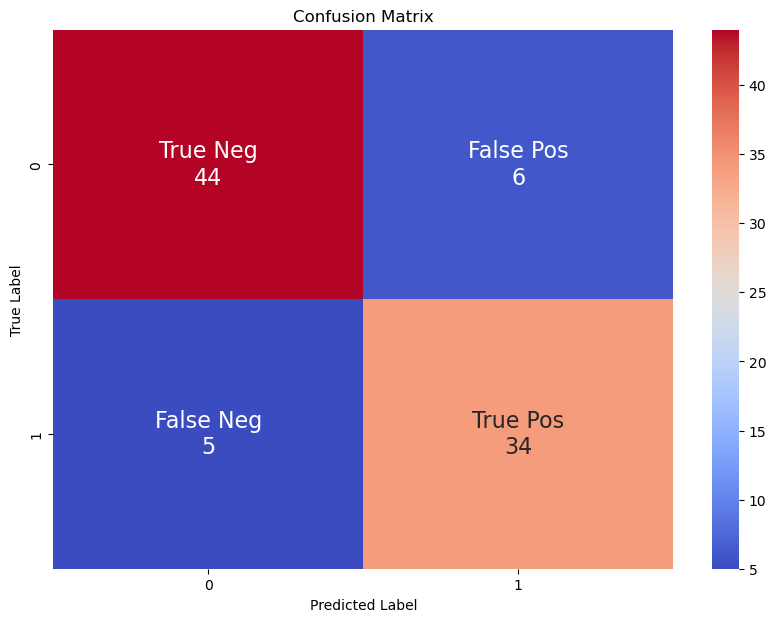

In [16]:
conf_mat = confusion_matrix(Y_test, decision_tree_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg', "False Pos", 'False Neg', "True Pos"]
group_counts = ["{0}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size":16}, fmt='', cmap = "coolwarm")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

SVM

In [17]:
#Support Vector machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
svv_Y_pred = svc.predict(X_test)
svc_accuracy = svc.score(X_test, Y_test)
svc_accuracy

0.8651685393258427

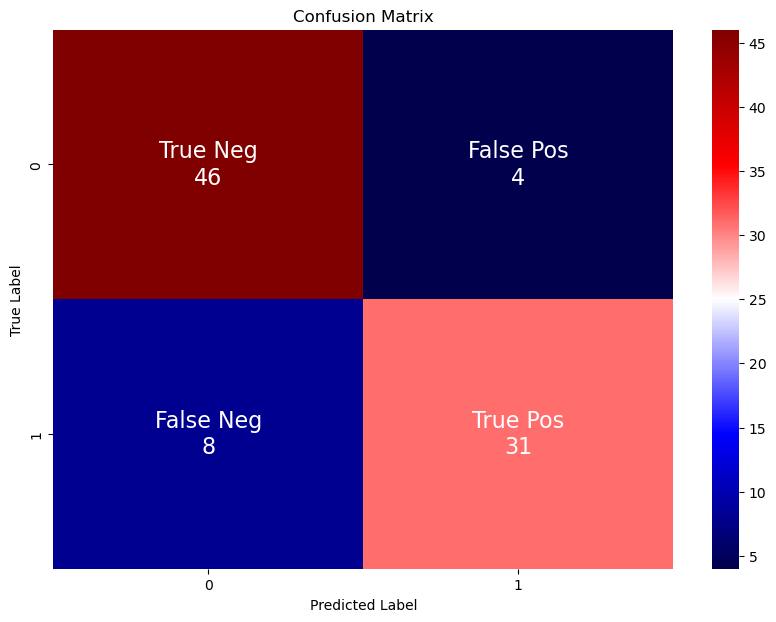

In [18]:
conf_mat = confusion_matrix(Y_test, svv_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg', "False Pos", 'False Neg', "True Pos"]
group_counts = ["{0}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size":16}, fmt='', cmap = "seismic")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Random Forest 

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest_accuracy = random_forest.score(X_test, Y_test)
random_forest_accuracy

0.898876404494382

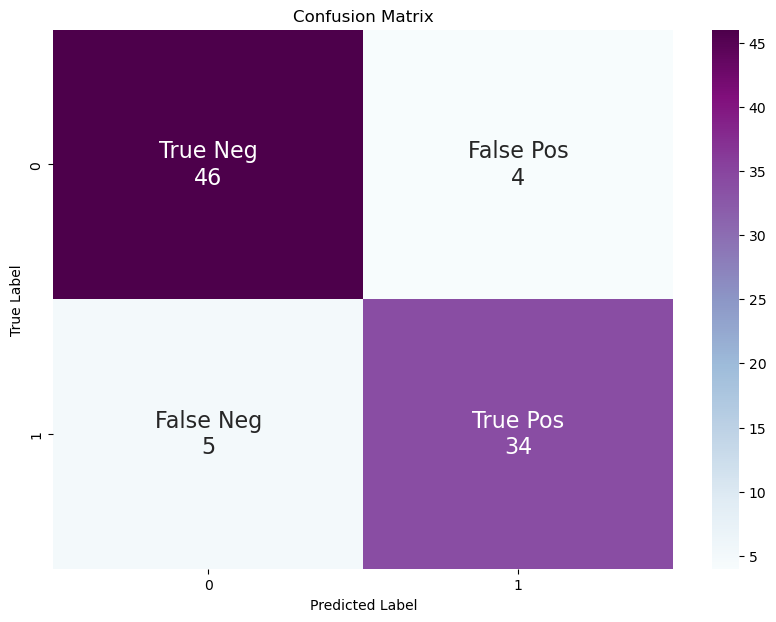

In [20]:
conf_mat = confusion_matrix(Y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg', "False Pos", 'False Neg', "True Pos"]
group_counts = ["{0}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size":16}, fmt='', cmap = "BuPu")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Gaussian naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
gaussian_Y_pred = gaussian.predict(X_test)
gaussian_accuracy = gaussian.score(X_test, Y_test)
gaussian_accuracy

0.8202247191011236

Logistic Regression

In [22]:
from sklearn.linear_model  import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
lg_Y_pred = lg.predict(X_test)
lg_accuracy = lg.score(X_test, Y_test)
lg_accuracy

0.8314606741573034

SIngle input Predictions

In [23]:
print("predicted Class :", random_forest.predict(X_train[10].reshape(1,-1)))
print("Actual Class :", Y_test.iloc[10])

predicted Class : [1]
Actual Class : 1


In [24]:
print("predicted Class :", random_forest.predict(X_train[50].reshape(1,-1)))
print("Actual Class :", Y_test.iloc[50])

predicted Class : [0]
Actual Class : 0


In [25]:
print("predicted Class :", random_forest.predict(X_train[25].reshape(1,-1)))
print("Actual Class :", Y_test.iloc[25])

predicted Class : [1]
Actual Class : 0


Predictive System

In [26]:
import pandas as pd
import numpy as np

def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    data = {
        "sl_no": [sl_no],
        "gender": [gender],
        "ssc_p": [ssc_p],
        "hsc_p": [hsc_p],
        "degree_p": [degree_p],
        "workex": [workex],
        "etest_p": [etest_p],
        "specialisation": [specialisation],
        "mba_p": [mba_p]
    }

    df = pd.DataFrame(data)

    df['gender'] = df['gender'].map({'M': 0, 'F': 1})
    df['workex'] = df['workex'].map({"No": 0, "Yes": 1})
    df['specialisation'] = df['specialisation'].map({"Mkt&HR": 0, "Mkt&Fin": 1})

    df = df[['sl_no', 'gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'specialisation', 'mba_p']]

    scaled_df = scaler.transform(df)
    result = random_forest.predict(scaled_df.reshape(1,-1))

    return result[0]


     


In [27]:
sl_no = 11
gender = "F"
ssc_p = 68.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)
if result == 1:
    print("Placed")
else:
    print("Not Placed")

    


Placed


In [28]:
import pickle
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
# 6. Save the model
# Save model
with open('models/model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save scaler
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!
